In [ ]:
pip install transformers datasets torch scikit-learn pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.4 MB/s eta 0:00:00


# **1. Fine Tunning  mBERT on multiligual Text Data**

### **`- Load multiligual datasets`**

In [ ]:
import pandas as pd
import torch
import random
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score
from transformers import DataCollatorWithPadding

# Set seed for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# Load the newly generated dataset
df = pd.read_csv("/content/generated_text_with_labels (1).csv")  # Replace with the actual file path

# Check the initial contents of the DataFrame
print("Original DataFrame:")
print(df.head())  # Print the first few rows
print(df.info())  # Print information about the DataFrame

# Convert any non-numeric values to NaN, if any
df['Label'] = pd.to_numeric(df['Label'], errors='coerce')

# Check DataFrame after converting to numeric
print("\nDataFrame after converting 'label' to numeric:")
print(df.head())
print(df.info())

# Remove missing values
df = df.dropna()

# Check DataFrame after dropping NaNs
print("\nDataFrame after dropping NaNs:")
print(df.head())
print(df.info())

Original DataFrame:
                                    Sentence  Label
0                     నేడు రాత్రి బాగా ఉంది.      3
1  She loved reading books in her free time.      4
2                   મને કટરાય પીરજના ભાઈ છે.      2
3      त्या दिनी मी कायम स른 सांगून होतuscam.      1
4          तुमच्या निश्चित इच्छा पूर्ण होते.      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  1025 non-null   object
 1   Label     1025 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 16.1+ KB
None

DataFrame after converting 'label' to numeric:
                                    Sentence  Label
0                     నేడు రాత్రి బాగా ఉంది.      3
1  She loved reading books in her free time.      4
2                   મને કટરાય પીરજના ભાઈ છે.      2
3      त्या दिनी मी कायम स른 सांगून होतuscam.      1
4          तुमच्या निश्चित इच्छा पूर्ण होते.  

### **`- Train-Test split`**
### **`- Load mBERT`**
### **`- Prepare Train-val Dataset for Training`**
### **`- Fine-tuning the mBERT model on multiligual dataset`**

In [ ]:
# Split data into train (80%) and test (20%)
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df["Sentence"].tolist(), df["Label"].tolist(), test_size=0.2,stratify=df['Label'], random_state=42
)

# Load the mBERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")

# Custom Dataset class
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer):
        self.texts = texts
        self.labels = [int(label) for label in labels]  # Convert float labels to int
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx],
            padding="max_length",
            truncation=True,
            max_length=128,
            return_tensors="pt"
        )
        item = {key: val.squeeze(0) for key, val in encoding.items()}
        item["labels"] = torch.tensor(self.labels[idx], dtype=torch.long)  # Ensure int64
        return item

# Prepare train and validation datasets
train_dataset = CustomDataset(train_texts, train_labels, tokenizer)
val_dataset = CustomDataset(val_texts, val_labels, tokenizer)

# Load pre-trained mBERT model
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=5)  # 5 labels for 5 languages

# Define training arguments
training_args = TrainingArguments(
    output_dir="./mbert-language-classifier",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=10,
    weight_decay=0.01,
    logging_dir="./logs",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    save_total_limit=2,
    report_to="none",  # Disable Weights & Biases logging
)

# Evaluation Metric
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return {"accuracy": accuracy_score(labels, predictions)}

# Data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Create Trainer instance
trainer_multiligual = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

# Train the model
trainer_multiligual.train()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,0.190600,0.002273,1.000000
2,0.001900,0.001008,1.000000
3,0.001100,0.000643,1.000000
4,0.000700,0.000469,1.000000
5,0.000600,0.000372,1.000000
6,0.000500,0.000313,1.000000
7,0.000400,0.000275,1.000000
8,0.000400,0.000251,1.000000
9,0.000300,0.000238,1.000000
10,0.000300,0.000233,1.000000


TrainOutput(global_step=1030, training_loss=0.01966584171484975, metrics={'train_runtime': 523.847, 'train_samples_per_second': 15.653, 'train_steps_per_second': 1.966, 'total_flos': 539392192051200.0, 'train_loss': 0.01966584171484975, 'epoch': 10.0})

#**1.1 Give me classification Report**

In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the validation set
predictions = trainer_multiligual.predict(val_dataset)

# Get predicted labels
predicted_labels = np.argmax(predictions.predictions, axis=1)

# Get true labels
true_labels = [example['labels'] for example in val_dataset]

# Generate classification report
report = classification_report(true_labels, predicted_labels, output_dict=True)

# Extract accuracy for each class (language)
accuracy_per_language = {}
for language_label in range(5): # Assuming 5 languages (0 to 4)
  accuracy_per_language[language_label] = report[str(language_label)]['precision']

# Print or use the accuracy_per_language dictionary
print(accuracy_per_language)

#Alternative to print a formatted table
# Convert the classification report dictionary to a pandas DataFrame
df_report = pd.DataFrame(report).transpose()

# Display the DataFrame as a formatted table
df_report


{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0}


,precision,recall,f1-score,support
0,1.0,1.0,1.0,40.0
1,1.0,1.0,1.0,43.0
2,1.0,1.0,1.0,38.0
3,1.0,1.0,1.0,42.0
4,1.0,1.0,1.0,42.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,205.0
weighted avg,1.0,1.0,1.0,205.0


#**1.2 Plotting validation and training loss with accuracy**

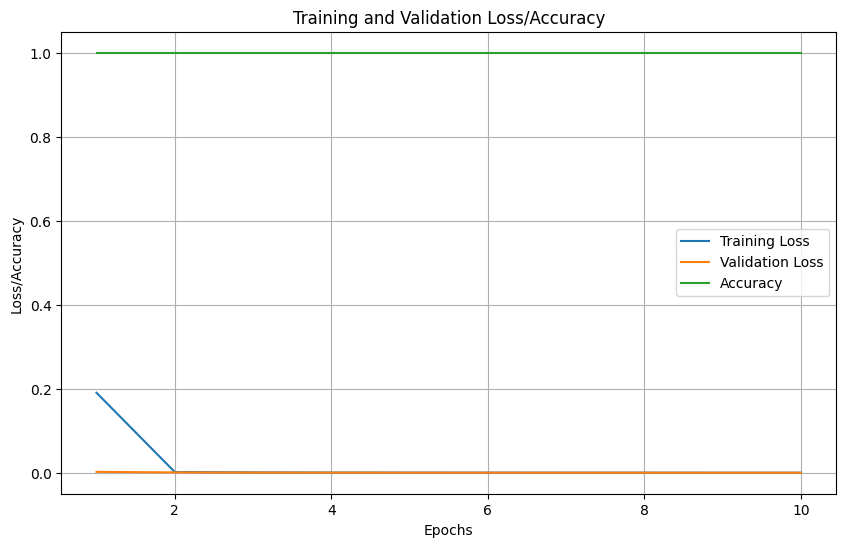

In [ ]:
import matplotlib.pyplot as plt

# Access training history
history = trainer_multiligual.state.log_history

# Extract relevant metrics
training_loss = [entry['loss'] for entry in history if 'loss' in entry]
validation_loss = [entry['eval_loss'] for entry in history if 'eval_loss' in entry]
accuracy = [entry['eval_accuracy'] for entry in history if 'eval_accuracy' in entry]

# Create the line plot
epochs = range(1, len(training_loss) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label="Training Loss")
plt.plot(epochs, validation_loss, label="Validation Loss")
plt.plot(epochs, accuracy, label="Accuracy")

# Add labels and title
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.title("Training and Validation Loss/Accuracy")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
# Save the fine-tuned model
model.save_pretrained("./mbert-language-multilanguage_classifier")
tokenizer.save_pretrained("./mbert-language-multilanguage_classifier")

print("Fine-tuning complete! Model saved to './mbert-language-multilanguage_classifier'")

Fine-tuning complete! Model saved to './mbert-language-multilanguage_classifier'


# **1.3 Prediction on sample sentence by fine_tuned multiligual model**

In [ ]:
# Load the fine-tuned model and tokenizer
model_path = "./mbert-language-multilanguage_classifier"
tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertForSequenceClassification.from_pretrained(model_path, num_labels=5)

# Set the model to evaluation mode
model.eval()

# Example sentence to predict
sentence = '''મિતલ અંધેરીના મોટી કંપનીમાં વ્યવસાય કરે છે અને તેઓ જુદી જુદી શૃંગારિક પ્રોડક્ટ પર કામ કરે છે.'''

# Tokenize the sentence
inputs = tokenizer(sentence, padding=True, truncation=True, max_length=128, return_tensors="pt")

# Make a prediction
with torch.no_grad():
    outputs = model(**inputs)

# Get the predicted label
predicted_class = torch.argmax(outputs.logits, dim=1).item()

# Decode the predicted class (assuming labels represent specific categories)
# Replace with your actual label mapping
label_mapping = {
    0: "Hindi",
    1: "Marathi",
    2: "Gujarati",
    3: "Telugu",
    4: "English"
}

decoded_label = label_mapping.get(predicted_class, "Unknown label")

# Print the decoded label
print(f"Predicted class: {predicted_class}, Decoded Label: {decoded_label}")


Predicted class: 2, Decoded Label: Gujarati


#**2. Loading Model for Fine Tunning on CODE-MIXED Language**

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
import evaluate

# Load the previously trained model and tokenizer
model_path = "./mbert-language-multilanguage_classifier"  # Path to your previously trained model
tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertForSequenceClassification.from_pretrained(model_path, num_labels=5)

# Load the code-mixed dataset
df = pd.read_csv("/content/mixed_language_dataset_updated.csv")  # Replace with your actual code-mixed dataset path

# Split data into train (80%) and test (20%)
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df["Sentence"].tolist(), df["Label"].tolist(), test_size=0.2, random_state=42
)

# Custom Dataset class for tokenization and encoding
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer):
        self.texts = texts
        self.labels = [int(label) for label in labels]
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx],
            padding="max_length",
            truncation=True,
            max_length=128,
            return_tensors="pt"
        )
        item = {key: val.squeeze(0) for key, val in encoding.items()}
        item["labels"] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

# Prepare datasets
train_dataset = CustomDataset(train_texts, train_labels, tokenizer)
val_dataset = CustomDataset(val_texts, val_labels, tokenizer)

# Define evaluation metric
accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    logits = torch.from_numpy(logits)  # Convert logits to PyTorch tensor
    predictions = torch.argmax(logits, dim=-1)
    return accuracy.compute(predictions=predictions, references=labels)

# Set up training arguments
training_args = TrainingArguments(
    output_dir="./mbert-language-classifier-finetuned",  # Directory to save the fine-tuned model
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=10,
    weight_decay=0.01,
    logging_dir="./logs",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    save_total_limit=2,
)

# Create Trainer instance
trainer_code_mixed = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

# Train the model
trainer_code_mixed.train()


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: kurliyedrk (kurliyedrk-centre-for-development-of-advanced-computing-) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.081900,0.000406,1.000000
2,0.000300,0.000182,1.000000
3,0.000200,0.000121,1.000000
4,0.000100,0.000089,1.000000
5,0.000100,0.000072,1.000000
6,0.000100,0.000061,1.000000
7,0.000100,0.000054,1.000000
8,0.000100,0.000049,1.000000
9,0.000100,0.000047,1.000000
10,0.000100,0.000046,1.000000


TrainOutput(global_step=1370, training_loss=0.008300057311209232, metrics={'train_runtime': 676.8393, 'train_samples_per_second': 16.193, 'train_steps_per_second': 2.024, 'total_flos': 720943710351360.0, 'train_loss': 0.008300057311209232, 'epoch': 10.0})

In [ ]:
# prompt: load this model to my drive

from google.colab import drive
drive.mount('/content/drive')

!cp -r /content/mbert-language-multilanguage_classifier /content/drive/MyDrive/NER_Models


Mounted at /content/drive


#**2.1 Give me classification Report**

In [ ]:
# Make predictions on the validation set
predictions = trainer_code_mixed.predict(val_dataset)

# Get predicted labels
predicted_labels = np.argmax(predictions.predictions, axis=1)

# Get true labels
true_labels = [example['labels'] for example in val_dataset]

# Generate classification report
report = classification_report(true_labels, predicted_labels, output_dict=True)

# Extract accuracy for each class (language)
accuracy_per_language = {}
for language_label in range(5): # Assuming 5 languages (0 to 4)
  accuracy_per_language[language_label] = report[str(language_label)]['precision']

# Print or use the accuracy_per_language dictionary
print(accuracy_per_language)

#Alternative to print a formatted table
# Convert the classification report dictionary to a pandas DataFrame
df_report = pd.DataFrame(report).transpose()

# Display the DataFrame as a formatted table
df_report

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0}


,precision,recall,f1-score,support
0,1.0,1.0,1.0,63.0
1,1.0,1.0,1.0,62.0
2,1.0,1.0,1.0,61.0
3,1.0,1.0,1.0,66.0
4,1.0,1.0,1.0,22.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,274.0
weighted avg,1.0,1.0,1.0,274.0


#**2.2 Plotting validation and training loss with accuracy**

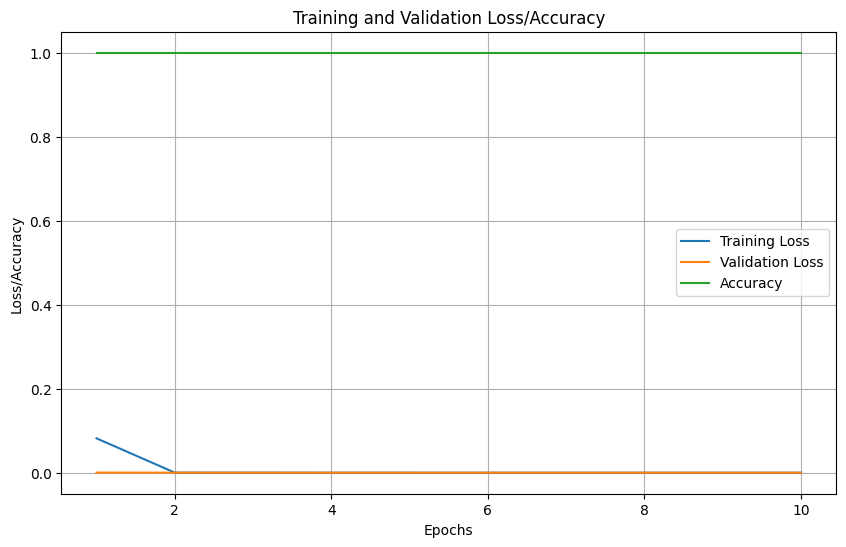

In [ ]:
import matplotlib.pyplot as plt

# Access training history
history = trainer_code_mixed.state.log_history

# Extract relevant metrics
training_loss = [entry['loss'] for entry in history if 'loss' in entry]
validation_loss = [entry['eval_loss'] for entry in history if 'eval_loss' in entry]
accuracy = [entry['eval_accuracy'] for entry in history if 'eval_accuracy' in entry]

# Create the line plot
epochs = range(1, len(training_loss) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label="Training Loss")
plt.plot(epochs, validation_loss, label="Validation Loss")
plt.plot(epochs, accuracy, label="Accuracy")

# Add labels and title
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.title("Training and Validation Loss/Accuracy")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
# Save the fine-tuned model
model.save_pretrained("./mbert-language-codeMixed-classifier")
tokenizer.save_pretrained("./mbert-language-codeMixed-classifier")

print("Fine-tuning complete! Model saved to './mbert-language-codeMixed-classifier'")

Fine-tuning complete! Model saved to './mbert-language-codeMixed-classifier'


# **2.3 Prediction on sample code-mixed sentence by fine_tuned code-mixed model**

In [ ]:
# Load the fine-tuned model and tokenizer
model_path = "./mbert-language-codeMixed-classifier"
tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertForSequenceClassification.from_pretrained(model_path, num_labels=5)

# Set the model to evaluation mode
model.eval()

# Example sentence to predict
sentence = '''I was talking to Priya about the new iPhone 15 that she bought from the Apple store in Mumbai, and she was so excited to show it off at her office next week. where my मां had prepared my favorite आहार. We spent time talking about my plans for the weekend, and I told her that I was planning to go to the मंदिर for पूजा.'''

# Tokenize the sentence
inputs = tokenizer(sentence, padding=True, truncation=True, max_length=128, return_tensors="pt")

# Make a prediction
with torch.no_grad():
    outputs = model(**inputs)

# Get the predicted label
predicted_class = torch.argmax(outputs.logits, dim=1).item()

# Decode the predicted class (assuming labels represent specific categories)
# Replace with your actual label mapping
label_mapping = {
    0: "Hindi",
    1: "Marathi",
    2: "Gujarati",
    3: "Telugu",
    4: "English"
}

decoded_label = label_mapping.get(predicted_class, "Unknown label")

# Print the decoded label
print(f"Predicted class: {predicted_class}, Decoded Label: {decoded_label}")


Predicted class: 4, Decoded Label: English


In [ ]:
# from google.colab import files
# import os

# # Define the paths to the models you want to download
# model_paths = ["./mbert-language-classifier_1", "./mbert-language-codeMixed-classifier"]

# # Function to zip a directory
# def zip_directory(directory_path, zip_filename):
#     os.system(f"zip -r {zip_filename} {directory_path}")
#     return zip_filename


# # Download each model
# for model_path in model_paths:
#   zip_file = zip_directory(model_path, f"{model_path}.zip")
#   files.download(zip_file)


# **3. Load NLLB on Mixed Text**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
tokenizer = AutoTokenizer.from_pretrained("facebook/nllb-200-distilled-600M")
model = AutoModelForSeq2SeqLM.from_pretrained("facebook/nllb-200-distilled-600M")

tokenizer_config.json:   0%|          | 0.00/564 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/4.85M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.3M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/3.55k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/846 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

In [ ]:
target_lang_code = None
if decoded_label == "Hindi":
  target_lang_code = "hin_Deva"
elif decoded_label == "Marathi":
  target_lang_code = "mar_Deva"
elif decoded_label == "Gujarati":
  target_lang_code = "guj_Gujr"
elif decoded_label == "Telugu":
  target_lang_code = "tel_Telu"
elif decoded_label== "English":
  target_lang_code = "eng_Latn"

def translate_paragraph(paragraph, target_lang=target_lang_code):
    sentences = sent_tokenize(paragraph)
    translated_sentences = []
    for sentence in sentences:
        inputs = tokenizer(sentence, return_tensors="pt")
        # Use tokenizer.convert_tokens_to_ids instead of tokenizer.lang_code_to_id
        translated_tokens = model.generate(**inputs, forced_bos_token_id=tokenizer.convert_tokens_to_ids(target_lang))
        translated_sentence = tokenizer.batch_decode(translated_tokens, skip_special_tokens=True)[0]
        translated_sentences.append(translated_sentence)
    return " ".join(translated_sentences)

translated_sent = translate_paragraph(sentence)
translated_sent

model.safetensors:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

'I was talking to Priya about the new iPhone 15 that she bought from the Apple store in Mumbai, and she was so excited to show it off at her office next week. where my mother had prepared my favorite diet. We spent time talking about my plans for the weekend, and I told her that I was planning to go to the temple for worship.'

### NER on Predominant translated Text

In [ ]:
!pip install torch transformers langchain

In [ ]:
!pip install langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.0/413.0 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.33
    Uninstalling langchain-core-0.3.33:
      Successfully uninstalled langchain-core-0.3.33
  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitters 0.3.5
    Uninstalling langchain-text-splitters-0.3.5:
      Successfully uninstalled langchain-text-splitters-0.3.5
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.17
    Uninstalling langchain-0.3.17:
      Successfully uninstalled langchain-0.3.17


In [ ]:
!pip install torch transformers langchain accelerate

###2.bert-base-multilingual-cased-ner-hrl

In [ ]:
import torch
from transformers import pipeline
from langchain.llms import HuggingFacePipeline

# Use a multilingual model fine-tuned for NER
model_id = "Davlan/bert-base-multilingual-cased-ner-hrl"  # Works for multiple languages

# Load pipeline with FP16 for lower GPU memory usage
ner_pipe = pipeline(
    "ner",
    model=model_id,
    tokenizer=model_id,
    device=0 if torch.cuda.is_available() else -1,  # Use GPU if available
    model_kwargs={"torch_dtype": torch.float16} if torch.cuda.is_available() else {}
)

# Wrap the model in LangChain
llm = HuggingFacePipeline(pipeline=ner_pipe)

# Function to extract named entities
def extract_entities(text):
    entities = ner_pipe(text)
    formatted_entities = [
        {"entity": e["word"], "label": e["entity"], "score": round(e["score"], 4)}
        for e in entities
    ]
    return formatted_entities


entities = extract_entities(translated_sent)
for entity in entities:
    print(f"{entity['entity']} {entity['label']}")

# # Example usage (supports multiple languages)
# texts = [
#     "Sundar Pichai is the CEO of Google, which is based in Mountain View.",  # English
#     "मुकेश अंबानी रिलायंस इंडस्ट्रीज के अध्यक्ष हैं।",  # Hindi
#     "सचिन तेंडुलकर हा भारताचा प्रसिद्ध क्रिकेटपटू आहे.",  # Marathi
#     "ગુજરાતમાં અમિતાભ બચ્ચનએ તાજ હોટલમાં નવી Maruti Swift કાર લૉન્ચ કરી.",  # Gujarati
#     "హైదరాబాద్ టెక్నాలజీ కంపెనీలకు ప్రసిద్ధి చెందిన నగరం."  # Telugu
# ]

# for text in texts:
#     print(f"\nInput Text: {text}")
#     entities = extract_entities(text)
#     for entity in entities:
#       # Access 'entity' instead of 'entity_group'
#       print(f"{entity['entity']} {entity['label']}")

Device set to use cuda:0


Pri B-PER
##ya I-PER
Apple B-ORG
Mumbai B-LOC


### **xlm-roberta-large-finetuned-conll03-english**
-  It is a pre-trained transformer model based on XLM-RoBERTa and fine-tuned on the CoNLL-03 dataset for Named Entity Recognition (NER) in English. It is useful for tasks like extracting names, locations, organizations, and entities from text.

In [ ]:
import torch
from transformers import pipeline
from langchain.llms import HuggingFacePipeline

# Use a multilingual model fine-tuned for NER
model_id = "xlm-roberta-large-finetuned-conll03-english"  # Works for multiple languages

# Load pipeline with FP16 for lower GPU memory usage
ner_pipe = pipeline(
    "ner",
    model=model_id,
    tokenizer=model_id,
    device=0 if torch.cuda.is_available() else -1,  # Use GPU if available
    model_kwargs={"torch_dtype": torch.float16} if torch.cuda.is_available() else {}
)

# Wrap the model in LangChain
llm = HuggingFacePipeline(pipeline=ner_pipe)

# Function to extract named entities
def extract_entities(text):
    entities = ner_pipe(text)
    formatted_entities = [
        {"entity": e["word"], "label": e["entity"], "score": round(e["score"], 4)}
        for e in entities
    ]
    return formatted_entities


entities = extract_entities(translated_sent)
for entity in entities:
    print(f"{entity['entity']} {entity['label']}")

# # Example usage (supports multiple languages)
# texts = [
#     "Sundar Pichai is the CEO of Google, which is based in Mountain View.",  # English
#     "मुकेश अंबानी रिलायंस इंडस्ट्रीज के अध्यक्ष हैं।",  # Hindi
#     "सचिन तेंडुलकर हा भारताचा प्रसिद्ध क्रिकेटपटू आहे.",  # Marathi
#     "ગુજરાતમાં અમિતાભ બચ્ચનએ તાજ હોટલમાં નવી Maruti Swift કાર લૉન્ચ કરી.",  # Gujarati
#     "హైదరాబాద్ టెక్నాలజీ కంపెనీలకు ప్రసిద్ధి చెందిన నగరం."  # Telugu
# ]

# for text in texts:
#     print(f"\nInput Text: {text}")
#     entities = extract_entities(text)
#     for entity in entities:
#       # Access 'entity' instead of 'entity_group'
#       print(f"{entity['entity']} {entity['label']}")

Some weights of the model checkpoint at xlm-roberta-large-finetuned-conll03-english were not used when initializing XLMRobertaForTokenClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


▁Pri I-PER
ya I-PER
▁iPhone I-MISC
▁15 I-MISC
▁Apple I-ORG
▁Mumbai I-LOC


In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification

# Define local directory for saving
local_dir = "./ner_model_xlm"

# Load the model and tokenizer separately
ner_tokenizer = AutoTokenizer.from_pretrained(model_id)
ner_model = AutoModelForTokenClassification.from_pretrained(model_id)

# Save to local directory
ner_tokenizer.save_pretrained(local_dir)
ner_model.save_pretrained(local_dir)

print(f"NER model and tokenizer saved to {local_dir}")


In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForTokenClassification

tokenizer = AutoTokenizer.from_pretrained("ai4bharat/IndicNER")
model = AutoModelForTokenClassification.from_pretrained("ai4bharat/IndicNER")

In [ ]:
def get_predictions( sentence, tokenizer, model ):
  # Let us first tokenize the sentence - split words into subwords
  tok_sentence = tokenizer(sentence, return_tensors='pt')

  with torch.no_grad():
    # we will send the tokenized sentence to the model to get predictions
    logits = model(**tok_sentence).logits.argmax(-1)

    # We will map the maximum predicted class id with the class label
    predicted_tokens_classes = [model.config.id2label[t.item()] for t in logits[0]]

    predicted_labels = []

    previous_token_id = 0
    # we need to assign the named entity label to the head word and not the following sub-words
    word_ids = tok_sentence.word_ids()
    for word_index in range(len(word_ids)):
        if word_ids[word_index] == None:
            previous_token_id = word_ids[word_index]
        elif word_ids[word_index] == previous_token_id:
            previous_token_id = word_ids[word_index]
        else:
            predicted_labels.append( predicted_tokens_classes[ word_index ] )
            previous_token_id = word_ids[word_index]

    return predicted_labels

In [ ]:
# let us try with some example sentences here
sentence = translated_sent

predicted_labels = get_predictions(sentence=sentence,
                                   tokenizer=tokenizer,
                                   model = model)

for index in range(len(sentence.split(' '))):
  print( sentence.split(' ')[index] + '\t' + predicted_labels[index] )

In [ ]:
# import joblib

# # Save the fine-tuned model and tokenizer using joblib
# joblib.dump(model, "./mbert-language-codeMixed-classifier_joblib.pkl")
# joblib.dump(tokenizer, "./mbert-language-codeMixed-classifier_tokenizer_joblib.pkl")

# print("Fine-tuned model and tokenizer saved using joblib!")

In [ ]:
# # prompt: give me gradio code where user can give input as code-mixed language sent and output as predominant language and translated language and name entities give gradio code for above

# import gradio as gr

# def predict_and_translate(text):
#     # Load the fine-tuned model and tokenizer for language identification
#     model_path = "./mbert-language-codeMixed-classifier"
#     tokenizer = BertTokenizer.from_pretrained(model_path)
#     model = BertForSequenceClassification.from_pretrained(model_path, num_labels=5)
#     model.eval()

#     # Tokenize the input text
#     inputs = tokenizer(text, padding=True, truncation=True, max_length=128, return_tensors="pt")

#     # Make a prediction
#     with torch.no_grad():
#         outputs = model(**inputs)
#     predicted_class = torch.argmax(outputs.logits, dim=1).item()

#     label_mapping = {
#         0: "Hindi",
#         1: "Mararthi",
#         2: "Gujarati",
#         3: "Telugu",
#         4: "English"
#     }
#     decoded_label = label_mapping.get(predicted_class, "Unknown label")

#     # Translation using NLLB
#     tokenizer_nllb = AutoTokenizer.from_pretrained("facebook/nllb-200-distilled-600M")
#     model_nllb = AutoModelForSeq2SeqLM.from_pretrained("facebook/nllb-200-distilled-600M")

#     target_lang_code = None
#     if decoded_label == "Hindi":
#         target_lang_code = "hin_Deva"
#     elif decoded_label == "Marathi":
#         target_lang_code = "mar_Deva"
#     elif decoded_label == "Gujarati":
#         target_lang_code = "guj_Gujr"
#     elif decoded_label == "Telugu":
#         target_lang_code = "tel_Telu"
#     elif decoded_label == "English":
#         target_lang_code = "eng_Latn"

#     if target_lang_code:
#         inputs_nllb = tokenizer_nllb(text, return_tensors="pt")
#         translated_tokens = model_nllb.generate(
#             **inputs_nllb, forced_bos_token_id=tokenizer_nllb.convert_tokens_to_ids(target_lang_code), max_length=30
#         )
#         Translated_sent = tokenizer_nllb.batch_decode(translated_tokens, skip_special_tokens=True)[0]
#     else:
#         Translated_sent = "Translation not available for this language"


#     # Named Entity Recognition using IndicNER
#     tokenizer_ner = AutoTokenizer.from_pretrained("ai4bharat/IndicNER")
#     model_ner = AutoModelForTokenClassification.from_pretrained("ai4bharat/IndicNER")

#         # Load model directly
#     from transformers import AutoTokenizer, AutoModelForTokenClassification

#     tokenizer = AutoTokenizer.from_pretrained("ai4bharat/IndicNER")
#     model = AutoModelForTokenClassification.from_pretrained("ai4bharat/IndicNER")


#     predicted_labels = get_predictions(sentence=Translated_sent,
#                                       tokenizer=tokenizer,
#                                       model=model
#                                       )
#     ner_results=''
#     for index in range(len(sentence.split(' '))):
#         ner_results+=sentence.split(' ')[index] + '\t' + predicted_labels[index]

#     return decoded_label, Translated_sent, ner_results


# iface = gr.Interface(
#     fn=predict_and_translate,
#     inputs=gr.Textbox(lines=2, placeholder="Enter code-mixed text here..."),
#     outputs=[
#         gr.Textbox(label="Predominant Language"),
#         gr.Textbox(label="Translated Text"),
#         gr.Textbox(label="Named Entities")
#     ],
#     title="Code-Mixed Text Analyzer",
#     description="Identify the predominant language, translate the text, and extract named entities."
# )

# iface.launch()


In [ ]:
# text='''આજે office મા meeting છે, but મારા પાસે report હવે સુધી તૈયાર નથી. मैं सुबह से try कर रहा हूँ but internet slow છે. నిన్న రాత్రి late work చేశాను, so I am feeling very tired. હવે boss will ask for updates, અને મને explain કરવું પડશે. दोस्त लोग also warned me कि તું time પર report complete કર, but still I got late. Now, I just hope કે somehow everything goes fine.'''

In [ ]:
#  # Named Entity Recognition using IndicNER
# tokenizer_ner = AutoTokenizer.from_pretrained("ai4bharat/IndicNER")
# model_ner = AutoModelForTokenClassification.from_pretrained("ai4bharat/IndicNER")



# predicted_labels = get_predictions(sentence=Translated_sent, tokenizer=tokenizer_ner, model=model_ner)
# ner_results = ""
# for index in range(len(Translated_sent.split(' '))):
#   ner_results += Translated_sent.split(' ')[index] + '\t' + predicted_labels[index] + '\n'

# print(decoded_label, Translated_sent, ner_results)